### 2. 4개의 화소를 분류하는 심층 신경망 프로그램

In [1]:
# install dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 특징데이터
X = np.array([[1, 1, 1, 1], 
              [0, 0, 0, 0], 
              [1, 0, 1, 0], 
              [0, 1, 0, 1], 
              [1, 0, 0, 1], 
              [0, 1, 1, 0], 
              [0, 0, 1, 1], 
              [1, 1, 0, 0]])

# 정답데이터 => 각 클래스를 정수로 표현 
y = np.array([0, 0, 1, 1, 2, 2, 3, 3])

# 라벨맵 저장 
label = {0: "SOLID", 1:"VERTICAL", 2:"DIAGIONAL", 3:"HORIZONTAL"}

In [2]:
model = tf.keras.Sequential([
    Dense(30, activation='relu', input_shape=(4, )),
    Dense(18, activation='relu'),
    Dense(4, activation='softmax') # 4개 클래스로 분류
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                150       
                                                                 
 dense_1 (Dense)             (None, 18)                558       
                                                                 
 dense_2 (Dense)             (None, 4)                 76        
                                                                 
Total params: 784
Trainable params: 784
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.compile(optimizer=Adam(0.01), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(X, y, epochs=20, verbose=0)

# 손실값과 정확도 출력 
loss, acc = model.evaluate(X, y)

1/1 [==============================] - 1s 788ms/step - loss: 0.6341 - accuracy: 1.0000


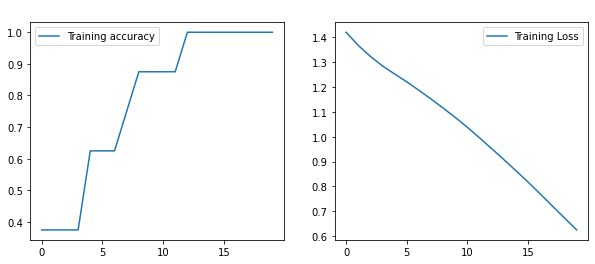

In [5]:
# 학습 과정 시각화 
def plot_history():    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.title('accuracy plot', color='white')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label = 'Training Loss')
    plt.title('loss plot', color='white')
    plt.legend()

plot_history()


In [6]:
def predict(data):
    pred = np.argmax(model.predict(data, verbose=3))
    print(f'class : {label[pred]}')


predict([[0.1, 0.1, 
          0.1, 0.2]])  
    

predict([[0.98, 0.05, 
          0.7, 0.13]])


predict([[0.7, 0.1, 
          0.01, 0.54]])


predict([[0.1, 0.1, 
          0.5, 0.8]])

class : SOLID
class : VERTICAL
class : DIAGIONAL
class : HORIZONTAL
